In [1]:
#Import all libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
#Read source files
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#Read source files
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Merge both files
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#Find Total rides, Total Drivers and Total Fares
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [11]:
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
#Create the summary dataframe
summary_df = pd.DataFrame({"Total Rides" : total_rides, "Total Drivers" : total_drivers, "Total Fares" : total_fares})

#Remove index
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [13]:
#Calculate Avg Fare per Ride and Avg Fare per Driver
summary_df["Average Fare per Ride"] = summary_df["Total Fares"]/summary_df["Total Rides"]
summary_df["Average Fare per Driver"] = summary_df["Total Fares"]/summary_df["Total Drivers"]
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [15]:
#Formatting summary DataFrame
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,.0f}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,.0f}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [16]:
#Rename columns
pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
#Set the index to the Date column
pyber_data_df = pyber_data_df.set_index("Date")
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [18]:
#Create a new DataFrame for fares and include only the Date, City Type, and Fare columns
pyber_new_df = pyber_data_df[["City Type", "Fare"]].copy()
pyber_new_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [19]:
#Set the index to the datetime data type
pyber_new_df.index = pd.to_datetime(pyber_new_df.index)

In [20]:
#Check the DataFrame
pyber_new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [21]:
#Calculate the sum of fares by the type of city and date
fares_bydate = pyber_new_df.groupby(["City Type", "Date"]).sum()["Fare"]
fares_bydate

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [22]:
#Reset the index
fares_bydate = fares_bydate.reset_index()
fares_bydate

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [23]:
#Create a pivot table DataFrame
pivot_table = pd.pivot_table(fares_bydate, values= "Fare" , index=["Date"],
                    columns=["City Type"], aggfunc=np.sum, fill_value=0)
pivot_table

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,0.0,0.00,37.91
2019-01-01 00:46:46,0.0,47.74,0.00
2019-01-01 02:07:24,0.0,24.07,0.00
2019-01-01 03:46:50,0.0,0.00,7.57
2019-01-01 05:23:21,0.0,0.00,10.75
...,...,...,...
2019-05-08 04:20:00,0.0,0.00,21.99
2019-05-08 04:39:49,0.0,0.00,18.45
2019-05-08 07:29:01,0.0,0.00,18.55


In [24]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' 
pivot_table_range = pivot_table.loc["2019-01-01":"2019-04-28"]
pivot_table_range

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,0.0,0.00,37.91
2019-01-01 00:46:46,0.0,47.74,0.00
2019-01-01 02:07:24,0.0,24.07,0.00
2019-01-01 03:46:50,0.0,0.00,7.57
2019-01-01 05:23:21,0.0,0.00,10.75
...,...,...,...
2019-04-28 14:28:36,0.0,0.00,11.46
2019-04-28 16:29:16,0.0,0.00,36.42
2019-04-28 17:26:52,0.0,0.00,31.43


In [25]:
#Calculate the sum of the fares for each week
weekly_fares_total = pivot_table_range.resample("W").sum()
weekly_fares_total

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


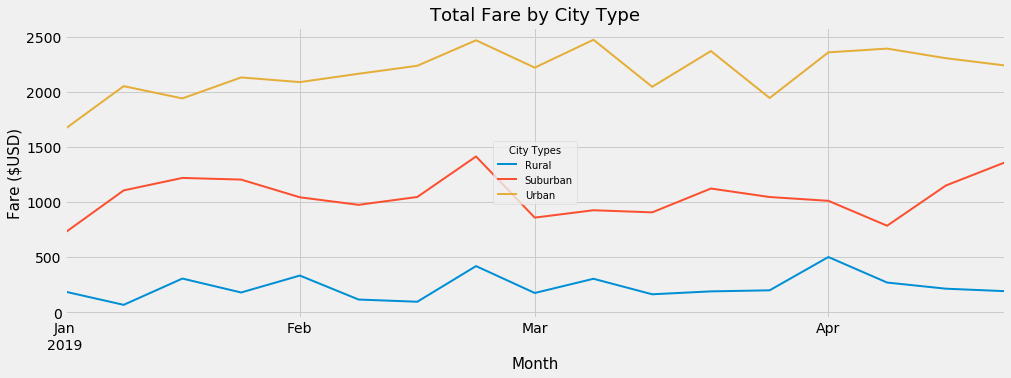

In [28]:
#Plot the table data
import matplotlib.style as style
style.use("fivethirtyeight")
ax = weekly_fares_total.plot(figsize = (15,5), linewidth = 2)
ax.set_title("Total Fare by City Type", fontsize = 18)
ax.set_ylabel("Fare ($USD)", fontsize = 15)
ax.set_xlabel("Month", fontsize = 15)

lgnd = plt.legend(fontsize = 10, loc = "best", title = "City Types")
lgnd.get_title().set_fontsize(10)

plt.savefig("Analysis/Total Fare by City Type.png")